In [1]:
import pandas as pd

这个数据集是台湾某银行 2005 年 4 月到 9 月的信用卡数据，数据集一共包括 25 个字段，具体含义如下：ID 客户id,limit_bat 可透支金额，sex 性别
education 教育程度，marriage 婚姻情况，age 年龄，pay 客户还款情况，bill_amt 客户每月账单金额,pay_amt 客户每月还款金额,
default.payment.next.month 客户下个月是否违约

In [3]:
data = pd.read_csv('./UCI_Credit_Card.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# 查看下一个月违约率的情况
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
default_count=data['default.payment.next.month'].value_counts()

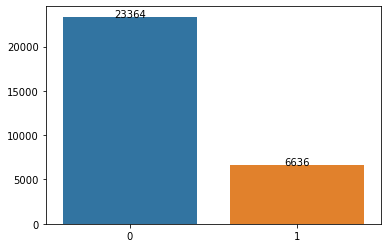

In [6]:
sns.barplot(default_count.index,default_count.values)
for x,y in zip(default_count.index,default_count.values):
    plt.text(x,y,'%s'%y,ha='center')
plt.show()

In [7]:
# 特征选择，去掉ID字段、最后一个结果字段即可
data.drop('ID',axis=1,inplace=True)
target = data['default.payment.next.month'].values
columns=data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

In [8]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)
# stratify划分出来的测试集或训练集中，其类标签的比例同输入的数组中类标签的比例相同，可以用于处理不均衡的数据集

In [9]:
# 构造各种分类器
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [12]:
# 建立各种分类器
classifiers =[
    svm.SVC(random_state = 1,kernel='rbf'),
    DecisionTreeClassifier(random_state = 1,criterion='gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
    AdaBoostClassifier(base_estimator=None,algorithm='SAMME.R',random_state=1)
]

In [10]:
# 分类器名称
classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
            'AdaBoostClassifier',
]

In [11]:
# 分类器参数
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
            {'AdaBoostClassifier__n_estimators':[50],'AdaBoostClassifier__learning_rate':[1.0]},
]

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])

In [18]:
# 对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch最优参数：", search.best_params_)
    print("GridSearch最优分数： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print("准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response

In [22]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score

In [23]:
result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

GridSearch最优参数： {'AdaBoostClassifier__learning_rate': 1.0, 'AdaBoostClassifier__n_estimators': 50}
GridSearch最优分数： 0.8178
准确率 0.8154


In [24]:
result

{'predict_y': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'accuracy_score': 0.8154444444444444}